<a href="https://colab.research.google.com/github/bogadisiva/Feb02072018_Siva/blob/master/myMlTainingModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Web Scrapping Code and saved to CSV file**

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

url = "https://www.worldometers.info/coronavirus/"
response = requests.get(url)

if response.status_code==200:
    print("Successfully connected to the website")
    soup=BeautifulSoup(response.content,'html.parser')
    print(soup.title.text)
    table=soup.find('table',{'id':'main_table_countries_today'})

    rows=table.find_all('tr')
    data=[]
    for row in rows[9:]:
        cols=row.find_all('td')
        country=cols[1].text.strip() if cols[1].text.strip() else "N/A"
        total_cases=cols[2].text.strip() if cols[2].text.strip() else "N/A"
        total_deaths=cols[4].text.strip() if cols[3].text.strip() else "N/A"
        total_recovered=cols[5].text.strip() if cols[4].text.strip() else "N/A"
        tot_cases_per_million=cols[6].text.strip() if cols[5].text.strip() else "N/A"
        deaths_per_million=cols[7].text.strip() if cols[6].text.strip() else "N/A"
        population=cols[7].text.strip() if cols[7].text.strip() else "N/A"
        data.append([country,total_cases,total_deaths,total_recovered,tot_cases_per_million,deaths_per_million,population])
    df=pd.DataFrame(data,columns=['Country','Total Cases','Total Deaths','Total Recovered','Total Cases Per Million','Deaths Per Million','Population'])
    df.to_csv('covid_data.csv',index=False)
    print("Data saved to csv file")
else:
    print("Failed to connect to the website",response.status_code)

Successfully connected to the website
COVID - Coronavirus Statistics - Worldometer
Data saved to csv file


# data pre-processing and loading

Mounted at /content/drive
     Country  Total Cases Total Deaths  Total Recovered  \
0        USA  111,820,082          NaN              NaN   
1      India   45,035,393          NaN              NaN   
2     France   40,138,560          NaN              NaN   
3    Germany   38,828,995          NaN              NaN   
4     Brazil   38,743,918          NaN              NaN   
..       ...          ...          ...              ...   
234   Total:   70,200,879          NaN              NaN   
235   Total:   14,895,771          NaN              NaN   
236   Total:   12,860,924          NaN              NaN   
237   Total:          721          NaN              NaN   
238   Total:  704,753,890    7,010,681              0.0   

    Total Cases Per Million  Deaths Per Million  Population  
0                       NaN                 NaN         NaN  
1                       NaN                 NaN         NaN  
2                       NaN                 NaN         NaN  
3                

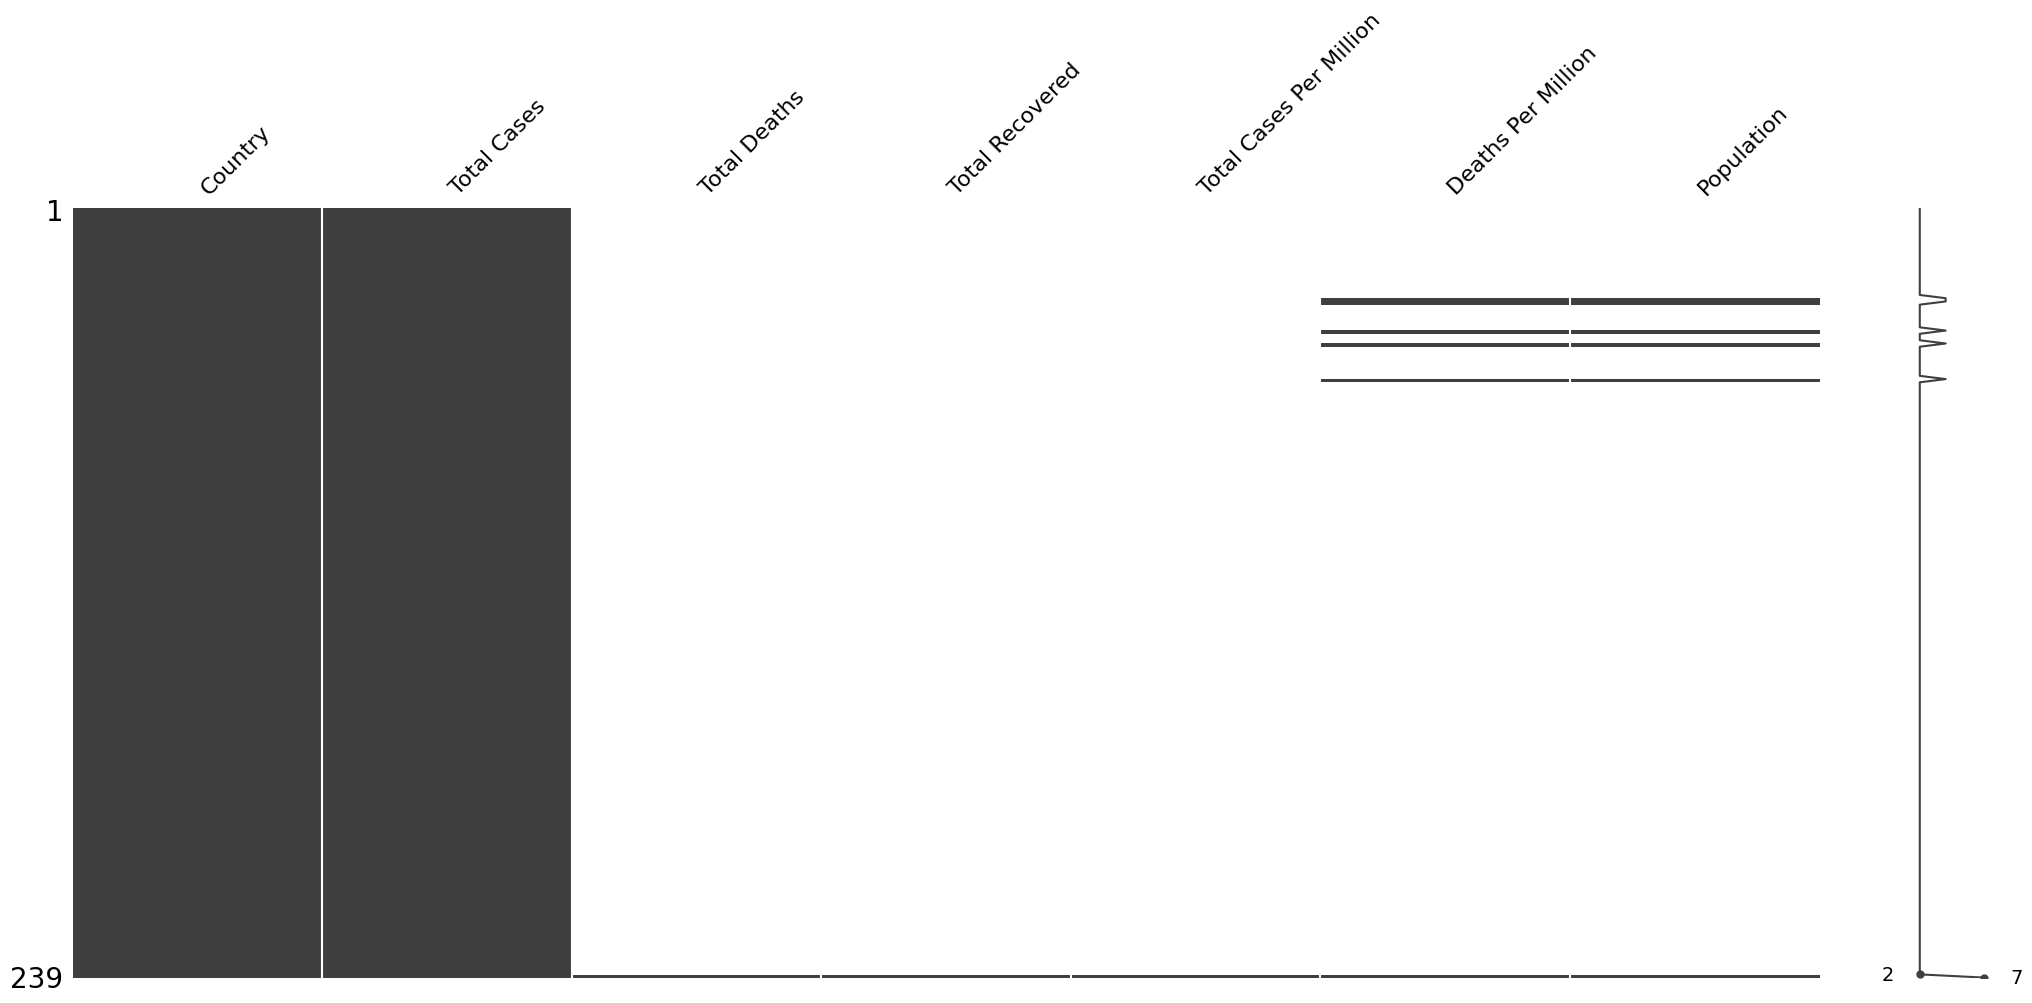

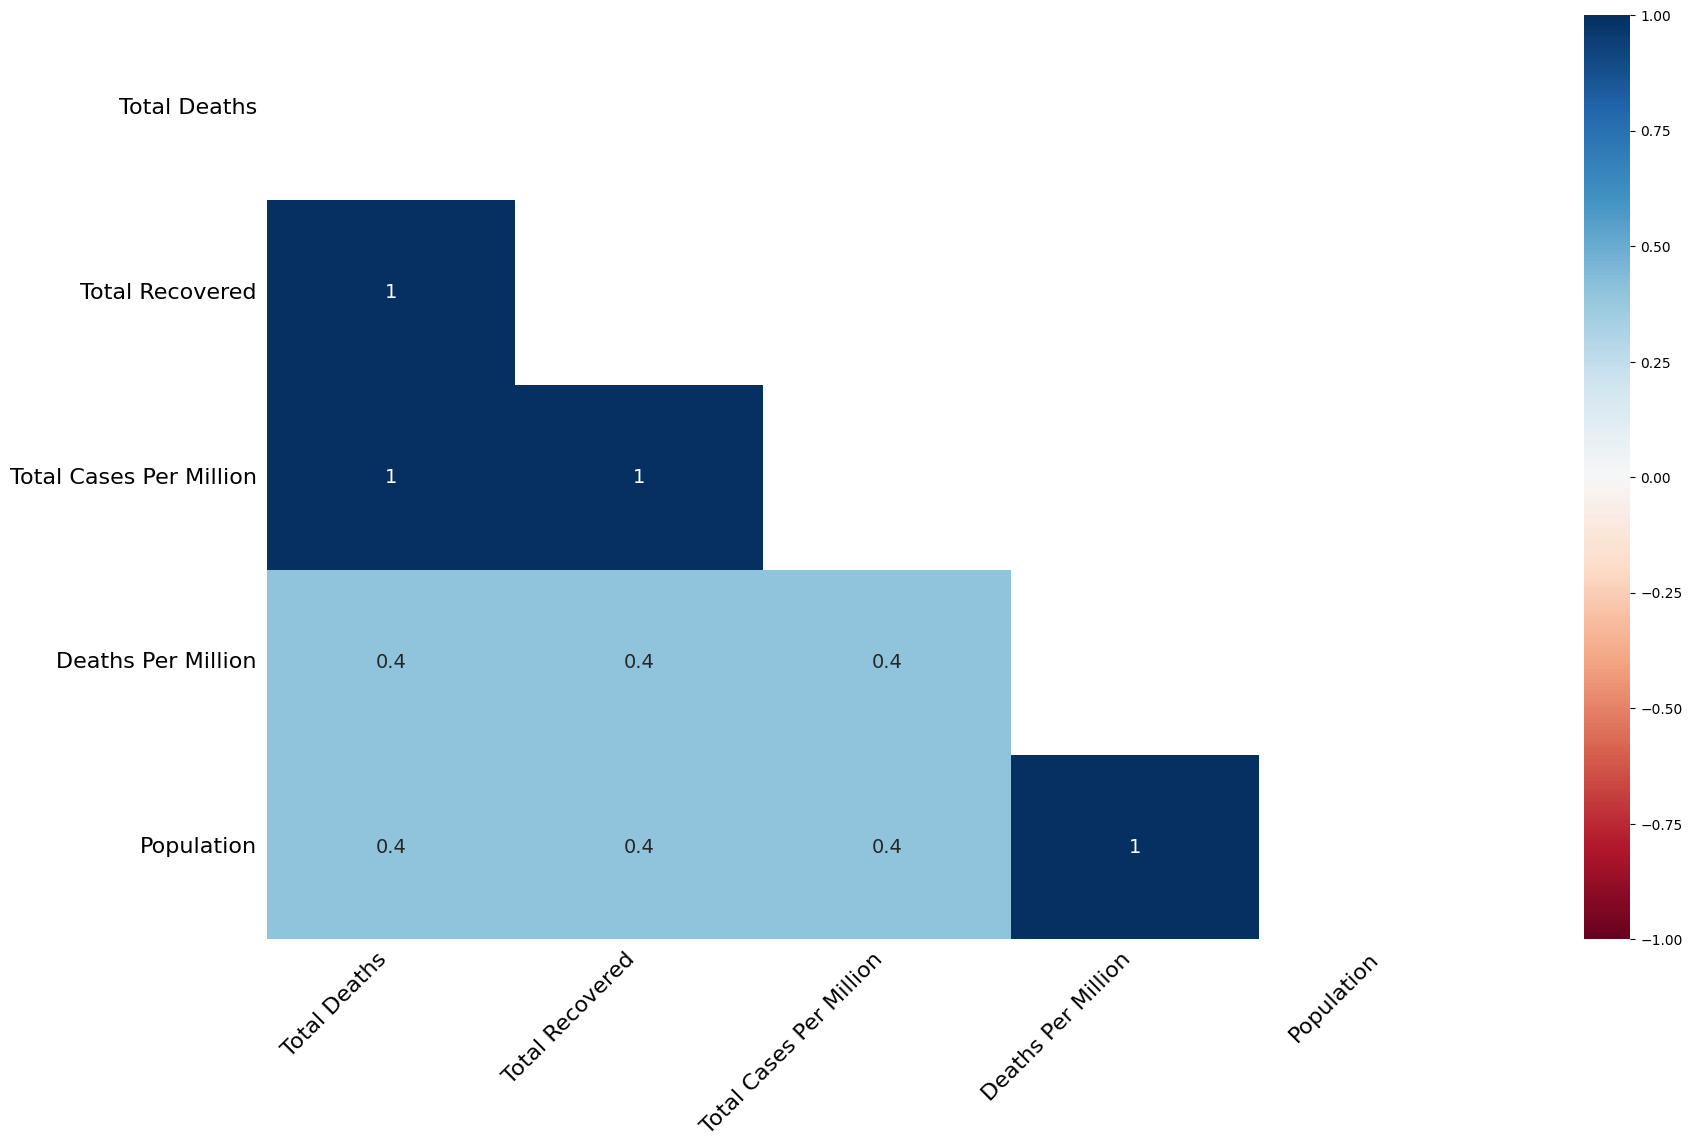

In [19]:
import missingno as masno
def loaddataset():
        # Load the dataset
        # data = pd.read_csv('covid_data.csv')
        drive.mount('/content/drive',force_remount=True)
        file_path = "/content/drive/My Drive/datasets/covid_data.csv"
        data = pd.read_csv(file_path  )
        return data

def missingvalues(data):
        # Visualize the missing values
        masno.matrix(data)
        masno.heatmap(data)
        # drop the missing values
        df_cleaned = data.dropna()

if __name__ == "__main__":
    data = loaddataset()
    print(data)
    print("Data loaded successfully")
    missingvalues(data)
    print(data)
    print("Data cleaned successfully")

**security vulnerabilities and Refine the code**


In [20]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
drive.mount('/content/drive',force_remount=True)
!ls "/content/drive/My Drive/datasets"
file_path = "/content/drive/My Drive/datasets/user_data.csv"
data=pd.read_csv(file_path)
print(data.head())
x= data.iloc[:,:-1]
y=data.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

model=LogisticRegression()
model.fit(x_train,y_train)
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(f'Model Accuracy:{result:.2f}')


Mounted at /content/drive
covid_data.csv	dataset1.csv  user_data.csv
   ID  Age  Salary Purchased
0   1   50   90000       Yes
1   2   40   80000        No
2   3   30   60000       Yes
3   4   20   40000        No
Model Accuracy:0.00


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
